<a href="https://www.kaggle.com/code/rinichristy/svm-support-vector-machines-on-wisconsin-data?scriptVersionId=92885387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **SVM (Support Vector Machines) on Wisconsin data**
SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. That is, it represents  for a linearly non separable data set, which is the case for most real world data sets.

**Kernelling**

Transfer this data to a higher-dimensional space, for example, mapping it to a three-dimensional space. The dimension of data can be increased by mapping x into a new space using a function with outputs x and x squared, for example. Basically, mapping data into a higher-dimensional space is called, kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as linear, polynomial, Radial Basis Function, or RBF, and sigmoid. Each of these functions has its own characteristics, its pros and cons, and its equation. 

**Support vector machine to find the best optimized hyperplanes and support vectors**

Now the data is linearly separable, the hyperplane is a line dividing a plane into two parts where each class lays on either side. In other words, after the transformation, the boundary between the two categories can be defined by a hyperplane. Basically, SVMs are based on the idea of finding a hyperplane that best divides a data set into separate classes. One reasonable choice as the best hyperplane is the one that represents the largest separation or margin between the two classes in a two dimensional space. Points closest to the hyperplane are support vectors. It is intuitive that only support vectors matter for achieving our goal. And thus, other points can be ignored. SVM try to find the hyperplane in such a way that it has the maximum distance to support vectors. The hyperplane and boundary decision lines have their own equations.

As the data is now in three-dimensional space, the separator is shown as a plane. This plane can be used to classify new or unknown cases. Following this, characteristics of new data can be used to predict the group to which a new record should belong. Therefore, the SVM algorithm outputs an optimal hyperplane that categorizes new examples. 


## **Table of Contents**

* [Dataset Information](#Dataset)
* [Method Development: Setting up the Support Vector Classifier](#Method)
* [Model Evaluation](#Evaluation)


**Import required library packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Set Information**<a name="Dataset"></a>
This breast cancer dataset was obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original))


The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
<br><br>
The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

**Attribute Information:**

The fields in each record are:
<br><br>

|Field name|Description|Values|
|--- |--- |--- |
|ID|Clump thickness|1 - 10|
|ClumpThickness|Clump thickness|1 - 10|
|UniformitySize|Uniformity of cell size|1 - 10|
|UniformityShape|Uniformity of cell shape|1 - 10|
|MarginalAdhesion|Marginal adhesion|1 - 10|
|EpithelialCellSize|Single epithelial cell size|1 - 10|
|BareNuclei|Bare nuclei|1 - 10|
|BlandChromatin|Bland chromatin|1 - 10|
|NormalNucleoli|Normal nucleoli|1 - 10|
|Mitoses|Mitoses|1 - 10|
|Class|Benign or malignant|benign (value = 2) or malignant (value = 4)|


In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",header=None)

In [3]:
df.columns = ['id', 'ClumpThickness', 'UniformitySize', 
              'UniformityShape', 'MarginalAdhesion', 
              'EpithelialCellSize', 'BareNuclei', 
              'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class']

In [4]:
df.head()

,id,ClumpThickness,UniformitySize,UniformityShape,MarginalAdhesion,EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df['Class'] = df['Class'].replace({2 : 'Benign', 4 : 'Malignant'})

In [6]:
df['BareNuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuclei, dtype: int64

In [7]:
df.replace('?', np.NaN, inplace=True)

In [8]:
df['BareNuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuclei, dtype: int64

In [9]:
df['BareNuclei'].isnull().sum()

16

In [10]:
df= df.dropna()

In [11]:
df['BareNuclei'].isnull().sum()

0

In [12]:
print(df.size)
print(df.shape)
print(df.ndim)

7513
(683, 11)
2


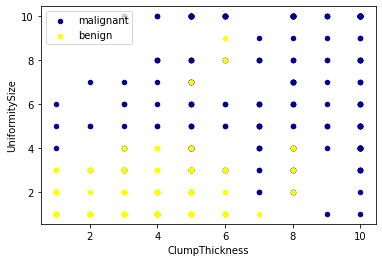

In [13]:
ax = df[df['Class'] == 'Malignant'].plot(kind='scatter', x='ClumpThickness', y='UniformitySize', color='DarkBlue', label='malignant');
df[df['Class'] == 'Benign'].plot(kind='scatter', x='ClumpThickness', y='UniformitySize', color='Yellow', label='benign', ax=ax)

plt.show()

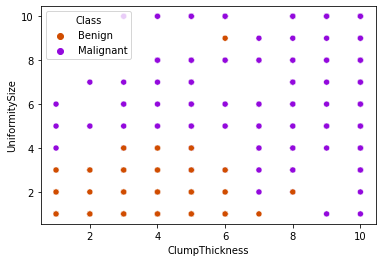

In [14]:
sns.scatterplot(x ='ClumpThickness', y = 'UniformitySize', data =df, hue = 'Class', palette = 'gnuplot_r');

In [15]:
df.columns

Index(['id', 'ClumpThickness', 'UniformitySize', 'UniformityShape',
       'MarginalAdhesion', 'EpithelialCellSize', 'BareNuclei',
       'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [16]:
# X = df.iloc[:,:-1]  
# X = df.drop(columns =['Class','id'])
# X = df[['id', 'ClumpThickness', 'UniformitySize', 'UniformityShape', 'MarginalAdhesion', 'EpithelialCellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses']] .values  #.astype(float)
# X = df.loc[:, df.columns != 'Class']
X = df.drop(['Class','id'],axis=1)
X

,ClumpThickness,UniformitySize,UniformityShape,MarginalAdhesion,EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [17]:
y = df["Class"]
y[0:5]

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Class, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print ('Train set- X_train shape:', X_train.shape,  ';  y_train shape:', y_train.shape)
print ('Test set- X_test shape:', X_test.shape, ';  y_train shape:', y_test.shape)

Train set- X_train shape: (546, 9) ;  y_train shape: (546,)
Test set- X_test shape: (137, 9) ;  y_train shape: (137,)


## **Method Development:**<a name="Method"></a>
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
```
1.Linear: Kernel = "linear"
2.Polynomial: Kernel = "poly" # degree = 2/3/ etc. 
3.Radial basis function (RBF): Kernel = "rbf"
4.Sigmoid: Kernel = "sigmoid"
```
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, choose different functions in turn and compare the results. 

Now fit the model with train set:

In [19]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train) 
y_pred = svm_rbf.predict(X_test)
y_pred[0:10]

array(['Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant'],
      dtype=object)

## **Model Evaluation - Support Vector Machine Classification**<a name="Evaluation"></a>
KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report

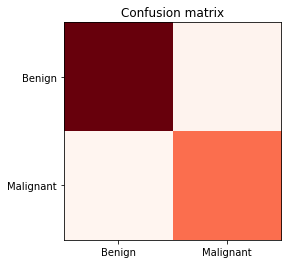

In [20]:
from sklearn.metrics import confusion_matrix
predict_train = svm_rbf.predict(X_train)
cm = confusion_matrix(y_train, predict_train)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.xticks(np.arange(0, 2), ['Benign', 'Malignant'])
plt.yticks(np.arange(0, 2), ['Benign', 'Malignant'])
plt.title('Confusion matrix');

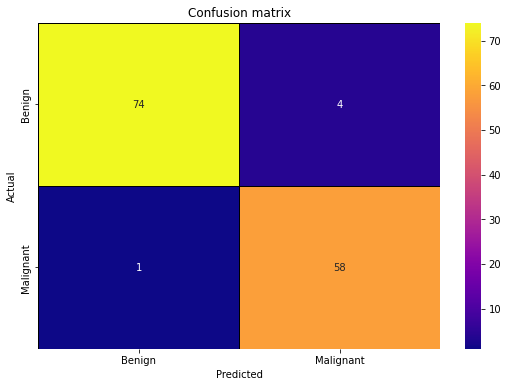

In [21]:
y_pred = svm_rbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,6))
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap = 'plasma',  linecolor='black', linewidths=1)
plt.xlabel("Predicted")
plt.ylabel("Actual");
plt.xticks(np.arange(0.5, 2.5), ['Benign', 'Malignant'])
plt.yticks(np.arange(0.5, 2.5), ['Benign', 'Malignant']);

**Benign Samples**

The first row is for test set samples in Benign Class. As can be calculated, out of 137 samples, the class of 78 of them is Benign. And out of these 78, the classifier correctly predicted 74 of them as Benign, and 4 of them as Malignant. 

It means, for 78 samples, the actual class were benign in test set, and classifier also correctly predicted those as benign. However, while the actual label of 4 samples were benign, the classifier predicted those as malignant, which is not a bad result. Consider it as error of the model for first row.  

**Samples in Malignant Class**

The classifier correctly predicted only 58 of them as malignant, and only 1 of them wrongly as benign. So, it has done a very good job in predicting the samples in malignant class. 

A good thing about confusion matrix is that it shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, these numbers can be interpreted as the count of true positives, false positives, true negatives, and false negatives on the basis of testing for poisonous quality of mushroom samples.

In this case, the model failed to detect only 1 malignant sample which is a very serious issue to be considered when dealing with medical samples. So Important metric when we care about false negatives is recall. Recall is also called True Positive rate or sensitivity.

**Recall**

Recall = TP/ Actual TRUE = TP/ (TP+FN) (when the class was actually TRUE, how often did the classiﬁer get it right?)
<br><br>
$$Recall = \frac{True Positive}{True Positive + False Negative}$$
<br>
$$Recall = \frac{58}{58+1} = 0.98$$ 
<br><br>
**Precision**

Precision = TP/Total TRUE Predictions (When model predicted TRUE class, how often was it right?) 

Precision is an important metric when False positives are important. In this case model wrongly predicted 60 edible mushrooms as poisonous. Its not a big deal. 
<br><br>
$$Precision = \frac{True Positives}{True Positives + False Positives}$$
<br>
$$Precision = \frac{58}{58+4} = 0.94$$
<br>
Here false negative is to be given more importance than false positives, focus should be on Recall metric.

Classiﬁcation Accuracy = (TP+TN) / (TP + TN + FP + FN) 

Misclassiﬁcation rate (Error Rate) = (FP + FN) / (TP + TN + FP + FN) 

In unbalanced datasets, if we have large number of true negatives (healthy patients), accuracy could be misleading. Therefore, F1 score might be a better KPI to use since it provides a balance between recall and precision in the presence of unbalanced datasets. 
F1 Score is an overall measure of a model's accuracy that combines precision and recall. 
F1 score is the harmonic mean of precision and recall. 
<br><br>
$$F1 Score = \frac{2 x Precision x Recall}{Precision + Recall}$$
<br> <br>
$$F1 Score = \frac{2 x TP}{2 x TP + FP +FN}$$

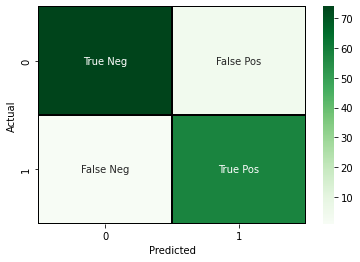

In [22]:
label = ["True Neg", "False Pos", "False Neg", "True Pos"]
label = np.asarray(label).reshape(2,2)
sns.heatmap(cm, annot=label, cmap='Greens', fmt='', linecolor='black', linewidths=2)
plt.xlabel("Predicted")
plt.ylabel("Actual");

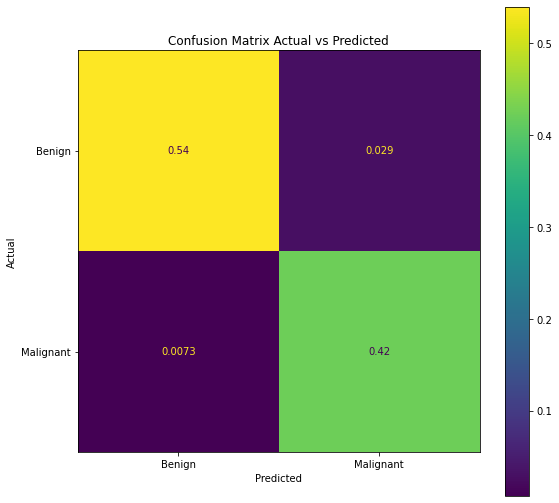

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
fig, ax = plt.subplots(figsize=(9,9))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix Actual vs Predicted');

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Support Vector Classifier (SVC) calculated manually is ', accuracy.round(2), '%')
print('Accuracy of Support Vector Classifier (SVC) is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of Support Vector Classifier (SVC):' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Support Vector Classifier (SVC):' '\n',classification_report(y_test, y_pred))

Accuracy of Support Vector Classifier (SVC) calculated manually is  0.96 %
Accuracy of Support Vector Classifier (SVC) is 0.96 % 

 
 Confusion Matrix of Support Vector Classifier (SVC):
 [[74  4]
 [ 1 58]]

 
 Classification Report for Support Vector Classifier (SVC):
               precision    recall  f1-score   support

      Benign       0.99      0.95      0.97        78
   Malignant       0.94      0.98      0.96        59

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



### **Linear Kernel**

Accuracy of Support Vector Classifier (SVC) calculated manually is  0.96 %
Accuracy of Support Vector Classifier (SVC) is 0.96 % 

 
 Confusion Matrix of Support Vector Classifier (SVC):
 [[75  3]
 [ 2 57]]

 
 Classification Report for Support Vector Classifier (SVC):
               precision    recall  f1-score   support

      Benign       0.97      0.96      0.97        78
   Malignant       0.95      0.97      0.96        59

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



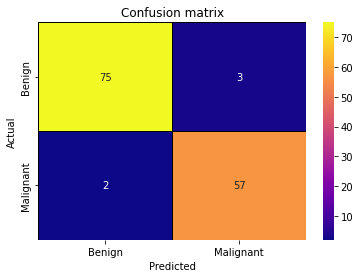

In [25]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train) 
y_pred = svm_linear.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Support Vector Classifier (SVC) calculated manually is ', accuracy.round(2), '%')
print('Accuracy of Support Vector Classifier (SVC) is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of Support Vector Classifier (SVC):' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Support Vector Classifier (SVC):' '\n',classification_report(y_test, y_pred))
plt.figure()
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap = 'plasma',  linecolor='black', linewidths=1)
plt.xlabel("Predicted")
plt.ylabel("Actual");
plt.xticks(np.arange(0.5, 2.5), ['Benign', 'Malignant'])
plt.yticks(np.arange(0.5, 2.5), ['Benign', 'Malignant']);

### **Sigmoid Kernel**

Accuracy of Support Vector Classifier (SVC) calculated manually is  0.41 %
Accuracy of Support Vector Classifier (SVC) is 0.41 % 

 
 Confusion Matrix of Support Vector Classifier (SVC):
 [[56 22]
 [59  0]]

 
 Classification Report for Support Vector Classifier (SVC):
               precision    recall  f1-score   support

      Benign       0.49      0.72      0.58        78
   Malignant       0.00      0.00      0.00        59

    accuracy                           0.41       137
   macro avg       0.24      0.36      0.29       137
weighted avg       0.28      0.41      0.33       137



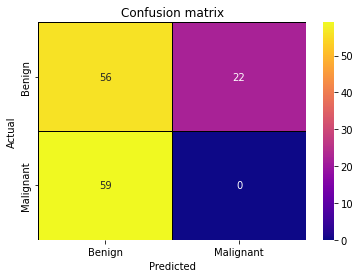

In [26]:
from sklearn import svm
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train) 
y_pred = svm_sigmoid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Support Vector Classifier (SVC) calculated manually is ', accuracy.round(2), '%')
print('Accuracy of Support Vector Classifier (SVC) is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of Support Vector Classifier (SVC):' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Support Vector Classifier (SVC):' '\n',classification_report(y_test, y_pred))
plt.figure()
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap = 'plasma',  linecolor='black', linewidths=1)
plt.xlabel("Predicted")
plt.ylabel("Actual");
plt.xticks(np.arange(0.5, 2.5), ['Benign', 'Malignant'])
plt.yticks(np.arange(0.5, 2.5), ['Benign', 'Malignant']);

### **Polynomial Kernel Degree 2**

Accuracy of Support Vector Classifier (SVC) calculated manually is  0.93 %
Accuracy of Support Vector Classifier (SVC) is 0.93 % 

 
 Confusion Matrix of Support Vector Classifier (SVC):
 [[75  3]
 [ 6 53]]

 
 Classification Report for Support Vector Classifier (SVC):
               precision    recall  f1-score   support

      Benign       0.93      0.96      0.94        78
   Malignant       0.95      0.90      0.92        59

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137



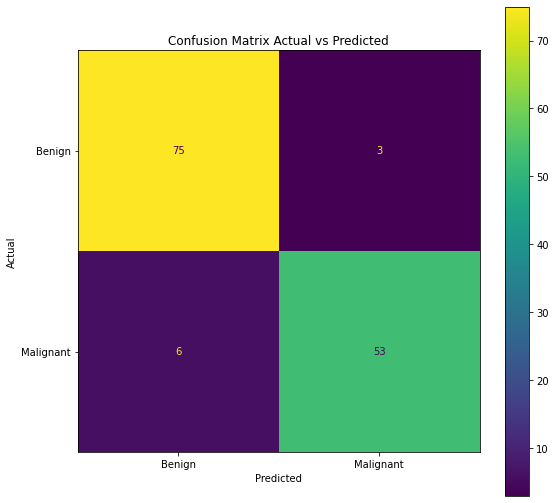

In [27]:
from sklearn import svm
svm_polynomial = svm.SVC(kernel='poly', degree=2, gamma=2)
svm_polynomial.fit(X_train, y_train) 
y_pred = svm_polynomial.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Support Vector Classifier (SVC) calculated manually is ', accuracy.round(2), '%')
print('Accuracy of Support Vector Classifier (SVC) is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of Support Vector Classifier (SVC):' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Support Vector Classifier (SVC):' '\n',classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
fig, ax = plt.subplots(figsize=(9,9))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix Actual vs Predicted');

### **Polynomial Kernel Degree 3**

Accuracy of Support Vector Classifier (SVC) calculated manually is  0.96 %
Accuracy of Support Vector Classifier (SVC) is 0.96 % 

 
 Confusion Matrix of Support Vector Classifier (SVC):
 [[75  3]
 [ 3 56]]

 
 Classification Report for Support Vector Classifier (SVC):
               precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        78
   Malignant       0.95      0.95      0.95        59

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



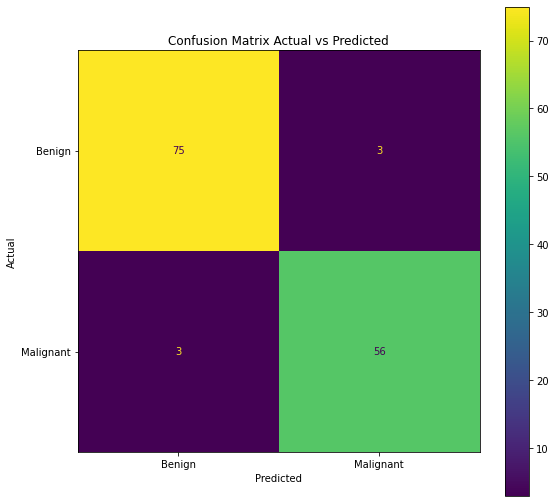

In [28]:
from sklearn import svm
svm_polynomial = svm.SVC(kernel='poly', degree=3)
svm_polynomial.fit(X_train, y_train) 
y_pred = svm_polynomial.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Support Vector Classifier (SVC) calculated manually is ', accuracy.round(2), '%')
print('Accuracy of Support Vector Classifier (SVC) is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of Support Vector Classifier (SVC):' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Support Vector Classifier (SVC):' '\n',classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
fig, ax = plt.subplots(figsize=(9,9))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix Actual vs Predicted');